# Implement a Perceptron

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("diabetes_scale.csv",sep='1:|2:|3:|4:|5:|6:|7:|8:',error_bad_lines=False,header=None,engine='python')
df.head(8)

,0,1,2,3,4,5,6,7,8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
5,1,-0.411765,0.165829,0.213115,-1.000000,-1.000000,-0.236960,-0.894962,-0.700000
6,-1,-0.647059,-0.216080,-0.180328,-0.353535,-0.791962,-0.076006,-0.854825,-0.833333
7,1,0.176471,0.155779,-1.000000,-1.000000,-1.000000,0.052161,-0.952178,-0.733333


In [3]:
# Check null values
print(df.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    9
dtype: int64


In [4]:
# Drop null rows
df = df.dropna()

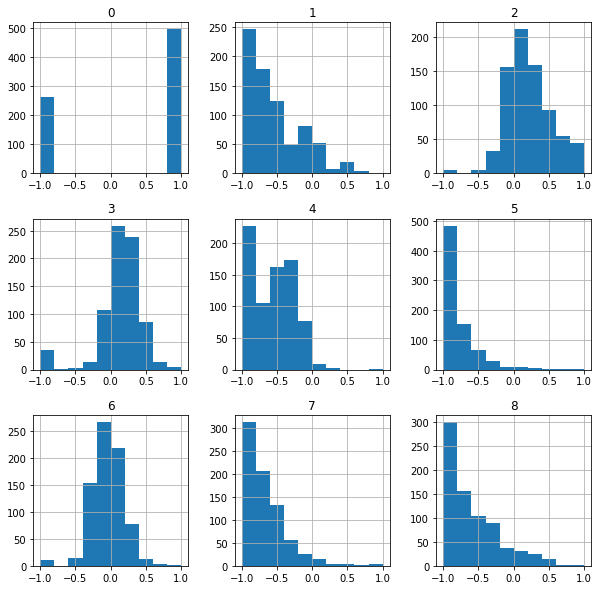

In [5]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [6]:
df = pd.DataFrame(np.c_[df.iloc[:,0],df.iloc[:,1], df.iloc[:,2], df.iloc[:,3], 
                      df.iloc[:,4], df.iloc[:,5], df.iloc[:,6],
                      df.iloc[:,7], df.iloc[:,8]], columns=['Outcome','1','2', '3', 
                      '4', '5', '6','7','8'])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


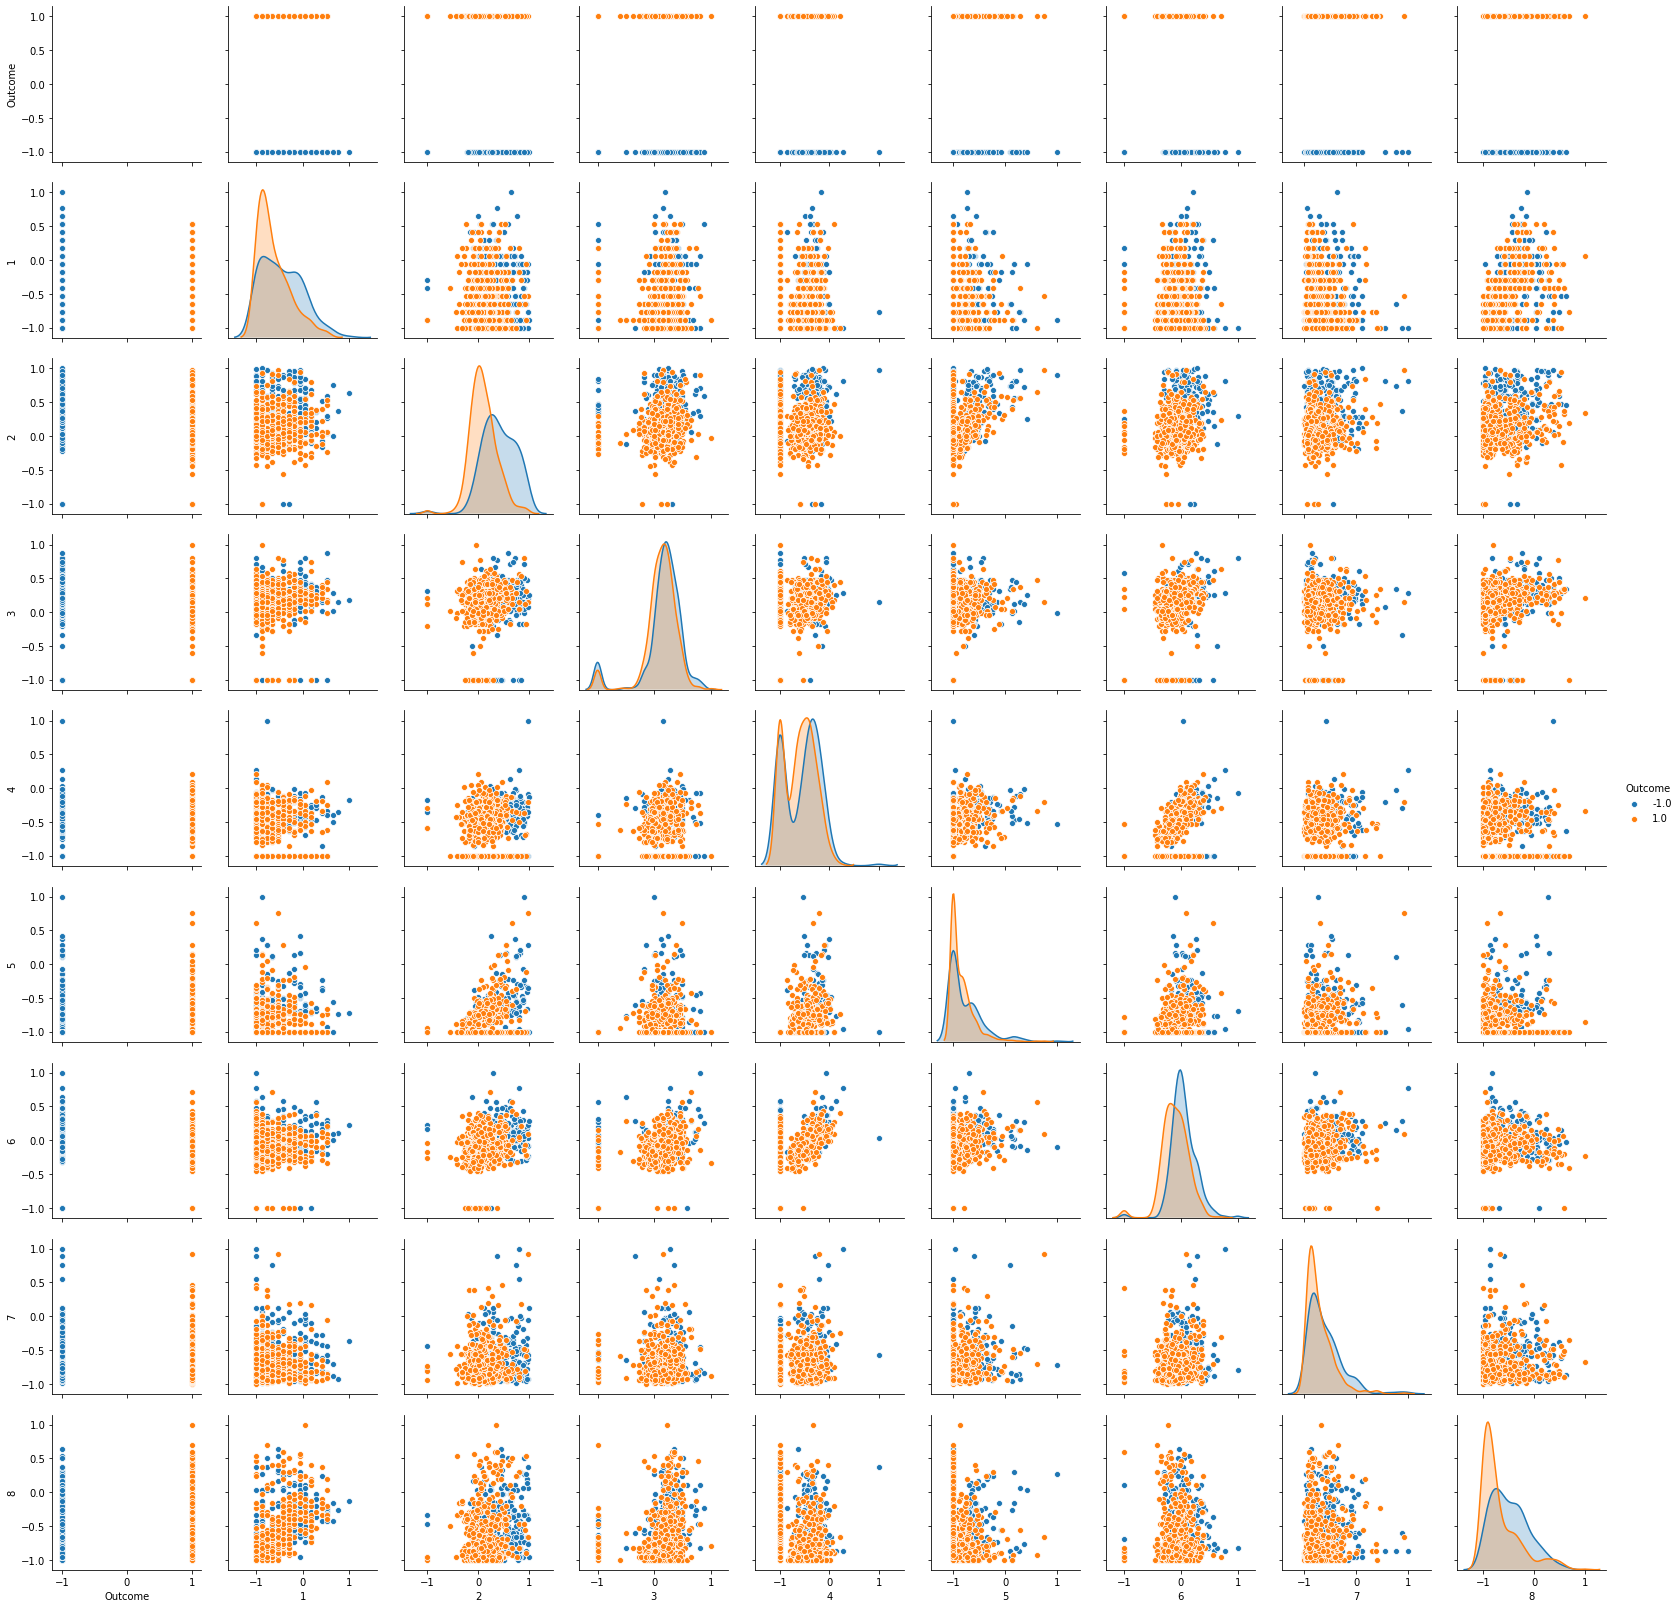

In [7]:
sns.pairplot(df,hue='Outcome')
plt.show()

In [8]:
X = df.drop(columns=['Outcome'])
# X.head()
Y = df['Outcome']
# Y.head()
len(X.columns)

8

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=51)

In [10]:
y_train = y_train.to_numpy()
x_train = x_train.to_numpy()
y_test = y_test.to_numpy()
x_test = x_test.to_numpy()

In [11]:
type(y_train)

numpy.ndarray

In [45]:
np.random.seed(51)
weights_def=np.random.randn(9,1)#*np.sqrt(1/len(X.columns))   # Xavier initialization
print('Weights',weights_def)
epochs = 10
lrrate = 0.1

Weights [[-0.29050317]
 [ 0.11212805]
 [ 1.25079512]
 [-1.36088997]
 [ 0.09993288]
 [-0.0479911 ]
 [-0.35622969]
 [-1.08855909]
 [-0.3510177 ]]


In [57]:
# predicts output given the rows and weights
def algorithm(x_train, x_test, lrrate, iterations):
    adjusted_weights=adjust_weights(x_train, lrrate, epochs)
    predictions_list = list()
    for x1 in x_test:
        predicted_y = yhat(x1,adjusted_weights)
        predictions_list.append(predicted_y)
    return predictions_list
def yhat(x1,x2):
    # The first weight is always the bias
    bias = x2[0]
    for i in range(len(x1)):
        bias = np.tanh( bias+ x2[i+1]*x1[i])
    return -1 if bias<0 else 1
def adjust_weights(x_train, lrrate, iterations):
    for i in range(iterations):
        for x1, y1 in zip(x_train,y_train):
            y_hat = yhat(x1,weights_def)
            error = y1 - y_hat
            for i in range(len(x1)):
                derivative = 1-(np.tanh((weights_def[0] + weights_def[i+1]*x1[i])))**2
                weights_def[i+1]=weights_def[i+1]+ lrrate*error*x1[i]*derivative
            weights_def[0] = weights_def[0] + lrrate*error
    return weights_def

def main():
    n_epochs = 150
    l_rate   = 0.1    
    result = algorithm(x_train, x_test, lrrate, epochs)
    from sklearn.metrics import accuracy_score
    Accuracy = accuracy_score(y_test, result)
    print(Accuracy)
        
if __name__ == '__main__':
	main()

0.7039473684210527
